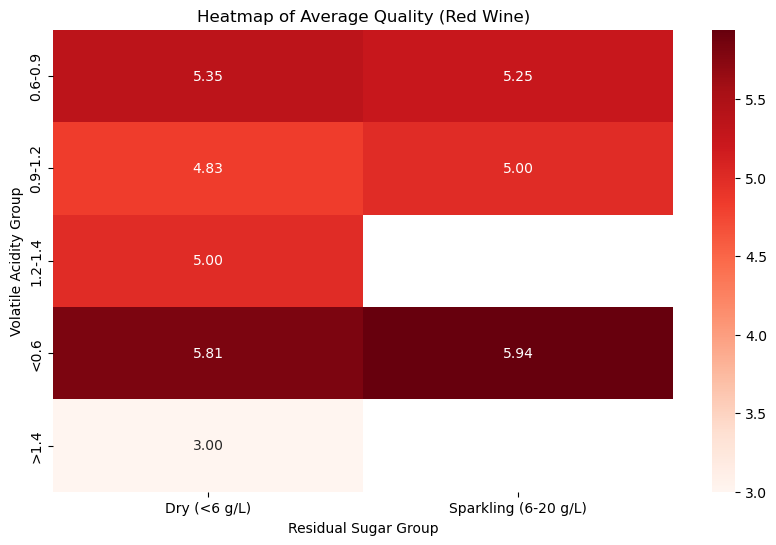

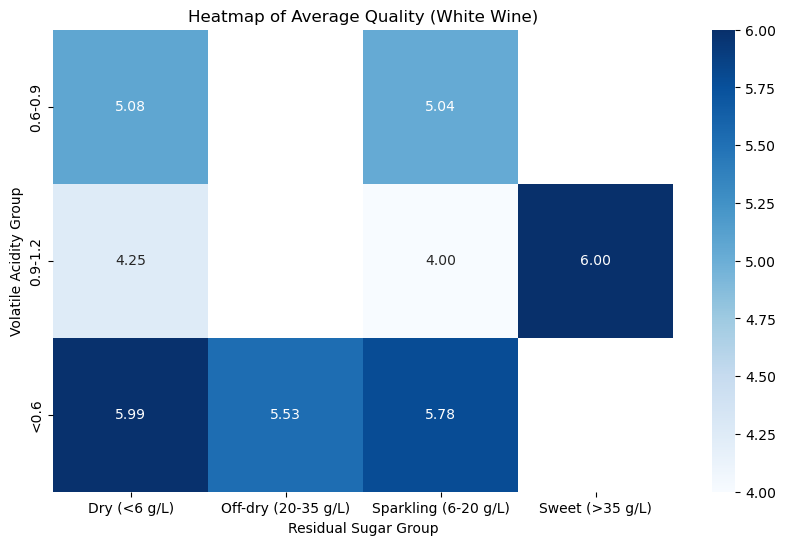

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = 'combined_wine_quality.csv'  # Replace with your file path
wine_data = pd.read_csv(file_path)

# Group volatile acidity
def group_volatile_acidity(value):
    if value < 0.6:
        return "<0.6"
    elif 0.6 <= value <= 0.9:
        return "0.6-0.9"
    elif 0.9 < value <= 1.2:
        return "0.9-1.2"
    elif 1.2 < value <= 1.4:
        return "1.2-1.4"
    else:
        return ">1.4"

# Group residual sugar
def group_residual_sugar(value):
    if value < 6:
        return "Dry (<6 g/L)"
    elif 6 <= value <= 20:
        return "Sparkling (6-20 g/L)"
    elif 20 < value < 35:
        return "Off-dry (20-35 g/L)"
    else:
        return "Sweet (>35 g/L)"

# Apply grouping
wine_data['volatile_acidity_group'] = wine_data['volatile acidity'].apply(group_volatile_acidity)
wine_data['residual_sugar_group'] = wine_data['residual sugar'].apply(group_residual_sugar)

# Split data by wine type
red_wine = wine_data[wine_data['type'] == 'red']
white_wine = wine_data[wine_data['type'] == 'white']

# Heatmap for red wine
heatmap_data_red = red_wine.groupby(
    ['volatile_acidity_group', 'residual_sugar_group']
)['quality'].mean().unstack()

plt.figure(figsize=(10, 6))
sns.heatmap(heatmap_data_red, annot=True, fmt=".2f", cmap="Reds")
plt.title("Heatmap of Average Quality (Red Wine)")
plt.xlabel("Residual Sugar Group")
plt.ylabel("Volatile Acidity Group")
plt.show()

# Heatmap for white wine
heatmap_data_white = white_wine.groupby(
    ['volatile_acidity_group', 'residual_sugar_group']
)['quality'].mean().unstack()

plt.figure(figsize=(10, 6))
sns.heatmap(heatmap_data_white, annot=True, fmt=".2f", cmap="Blues")
plt.title("Heatmap of Average Quality (White Wine)")
plt.xlabel("Residual Sugar Group")
plt.ylabel("Volatile Acidity Group")
plt.show()

